In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme(style="whitegrid")

In [4]:
data = pd.read_csv('customer_data.csv')

In [5]:
print(data.describe())
print(data.info())

       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (to

In [ ]:
print(data.dtypes)

In [17]:
# Map 'Yes'/'No' to 1/0 in 'Discount Applied'
data['Discount Applied'] = data['Discount Applied'].map({'Yes': 1, 'No': 0})

# If 'Frequency of Purchases' contains specific strings, map them to numeric
frequency_mapping = {'Low': 1, 'Medium': 2, 'High': 3}  # Example mapping
data['Frequency of Purchases'] = data['Frequency of Purchases'].map(frequency_mapping)

In [20]:
numerical_features = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Discount Applied', 'Previous Purchases', 'Frequency of Purchases']

In [ ]:
data['Discount Applied'] = data['Discount Applied'].map({'Yes': 1, 'No': 0})
frequency_mapping = {'Low': 1, 'Medium': 2, 'High': 3}  # Example mapping
data['Frequency of Purchases'] = data['Frequency of Purchases'].map(frequency_mapping)

In [ ]:
data['Discount Applied'] = data['Discount Applied'].fillna(0)
data['Frequency of Purchases'] = data['Frequency of Purchases'].fillna(data['Frequency of Purchases'].mean())

In [29]:
if data['Frequency of Purchases'].isna().all():
    # If the entire column is NaN, set a default value, e.g., 1 (or another appropriate value)
    data['Frequency of Purchases'] = 1
else:
    # Otherwise, fill NaN values with the mode
    mode_frequency = data['Frequency of Purchases'].mode()[0]
    data['Frequency of Purchases'] = data['Frequency of Purchases'].fillna(mode_frequency)


Age                       0
Purchase Amount (USD)     0
Review Rating             0
Discount Applied          0
Previous Purchases        0
Frequency of Purchases    0
dtype: int64


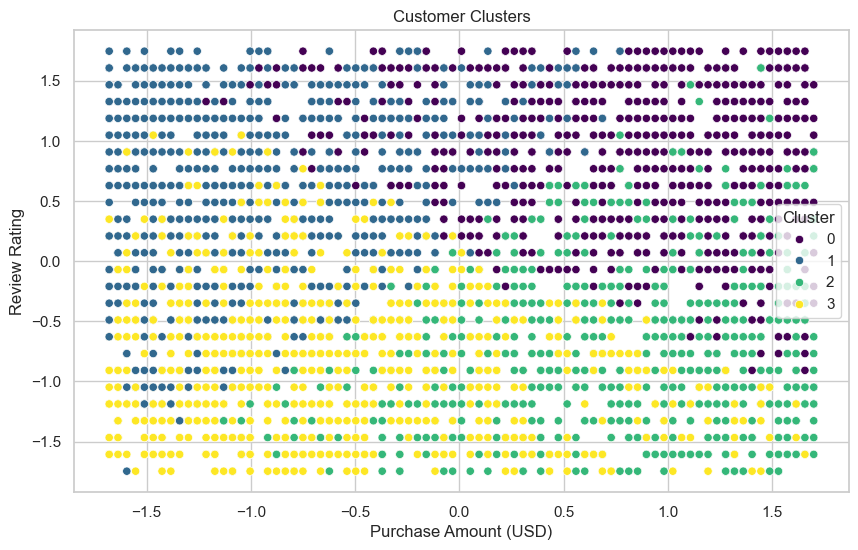

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Verify no NaN values remain
print(data[numerical_features].isna().sum())

scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data[numerical_features])

data['Cluster'] = kmeans.labels_

# Example visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Purchase Amount (USD)'], y=data['Review Rating'], hue=data['Cluster'], palette='viridis')
plt.title('Customer Clusters')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Review Rating')
plt.show()


In [32]:
numeric_data = data.select_dtypes(include=[np.number])


In [33]:
cluster_summary = numeric_data.groupby(data['Cluster']).mean()
print(cluster_summary)


         Customer ID       Age  Purchase Amount (USD)  Review Rating  \
Cluster                                                                
0        1954.417427  0.513089               0.776299       0.820435   
1        1950.452183 -0.603771              -0.882361       0.622642   
2        1973.290889 -0.773542               0.705767      -0.638881   
3        1926.862500  0.749140              -0.538779      -0.794932   

         Discount Applied  Previous Purchases  Frequency of Purchases  Cluster  
Cluster                                                                         
0                     0.0            0.258463                     0.0      0.0  
1                     0.0           -0.210500                     0.0      1.0  
2                     0.0           -0.348509                     0.0      2.0  
3                     0.0            0.254701                     0.0      3.0  


In [34]:
for cluster in data['Cluster'].unique():
    print(f"Cluster {cluster}:")
    print(data[data['Cluster'] == cluster][numeric_data.columns].describe())
    print("\n")


Cluster 3:
       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  1040.000000  1040.000000            1040.000000    1040.000000   
mean   1926.862500     0.749140              -0.538779      -0.794932   
std    1121.221152     0.673828               0.792012       0.650627   
min       1.000000    -1.648629              -1.679071      -1.745419   
25%     935.500000     0.324323              -1.172365      -1.326501   
50%    1917.500000     0.850444              -0.665658      -0.907584   
75%    2867.500000     1.310799              -0.032275      -0.349027   
max    3900.000000     1.705390               1.698971       1.187005   

       Discount Applied  Previous Purchases  Frequency of Purchases  Cluster  
count            1040.0         1040.000000                  1040.0   1040.0  
mean                0.0            0.254701                     0.0      3.0  
std                 0.0            0.958578                     0.0      0.0  
min            

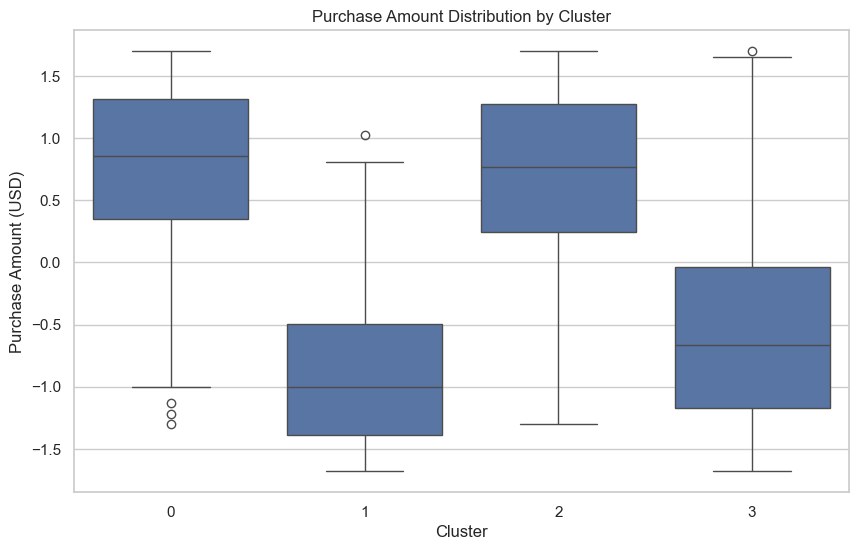

In [35]:
# Example: Distribution of Purchase Amount by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Purchase Amount (USD)', data=data)
plt.title('Purchase Amount Distribution by Cluster')
plt.show()


In [36]:
# Analyze how clusters differ in terms of Subscription Status (or other categorical features)
subscription_by_cluster = data.groupby('Cluster')['Subscription Status'].value_counts(normalize=True).unstack()
print(subscription_by_cluster)


Subscription Status        No       Yes
Cluster                                
0                    0.729483  0.270517
1                    0.734927  0.265073
2                    0.740944  0.259056
3                    0.716346  0.283654


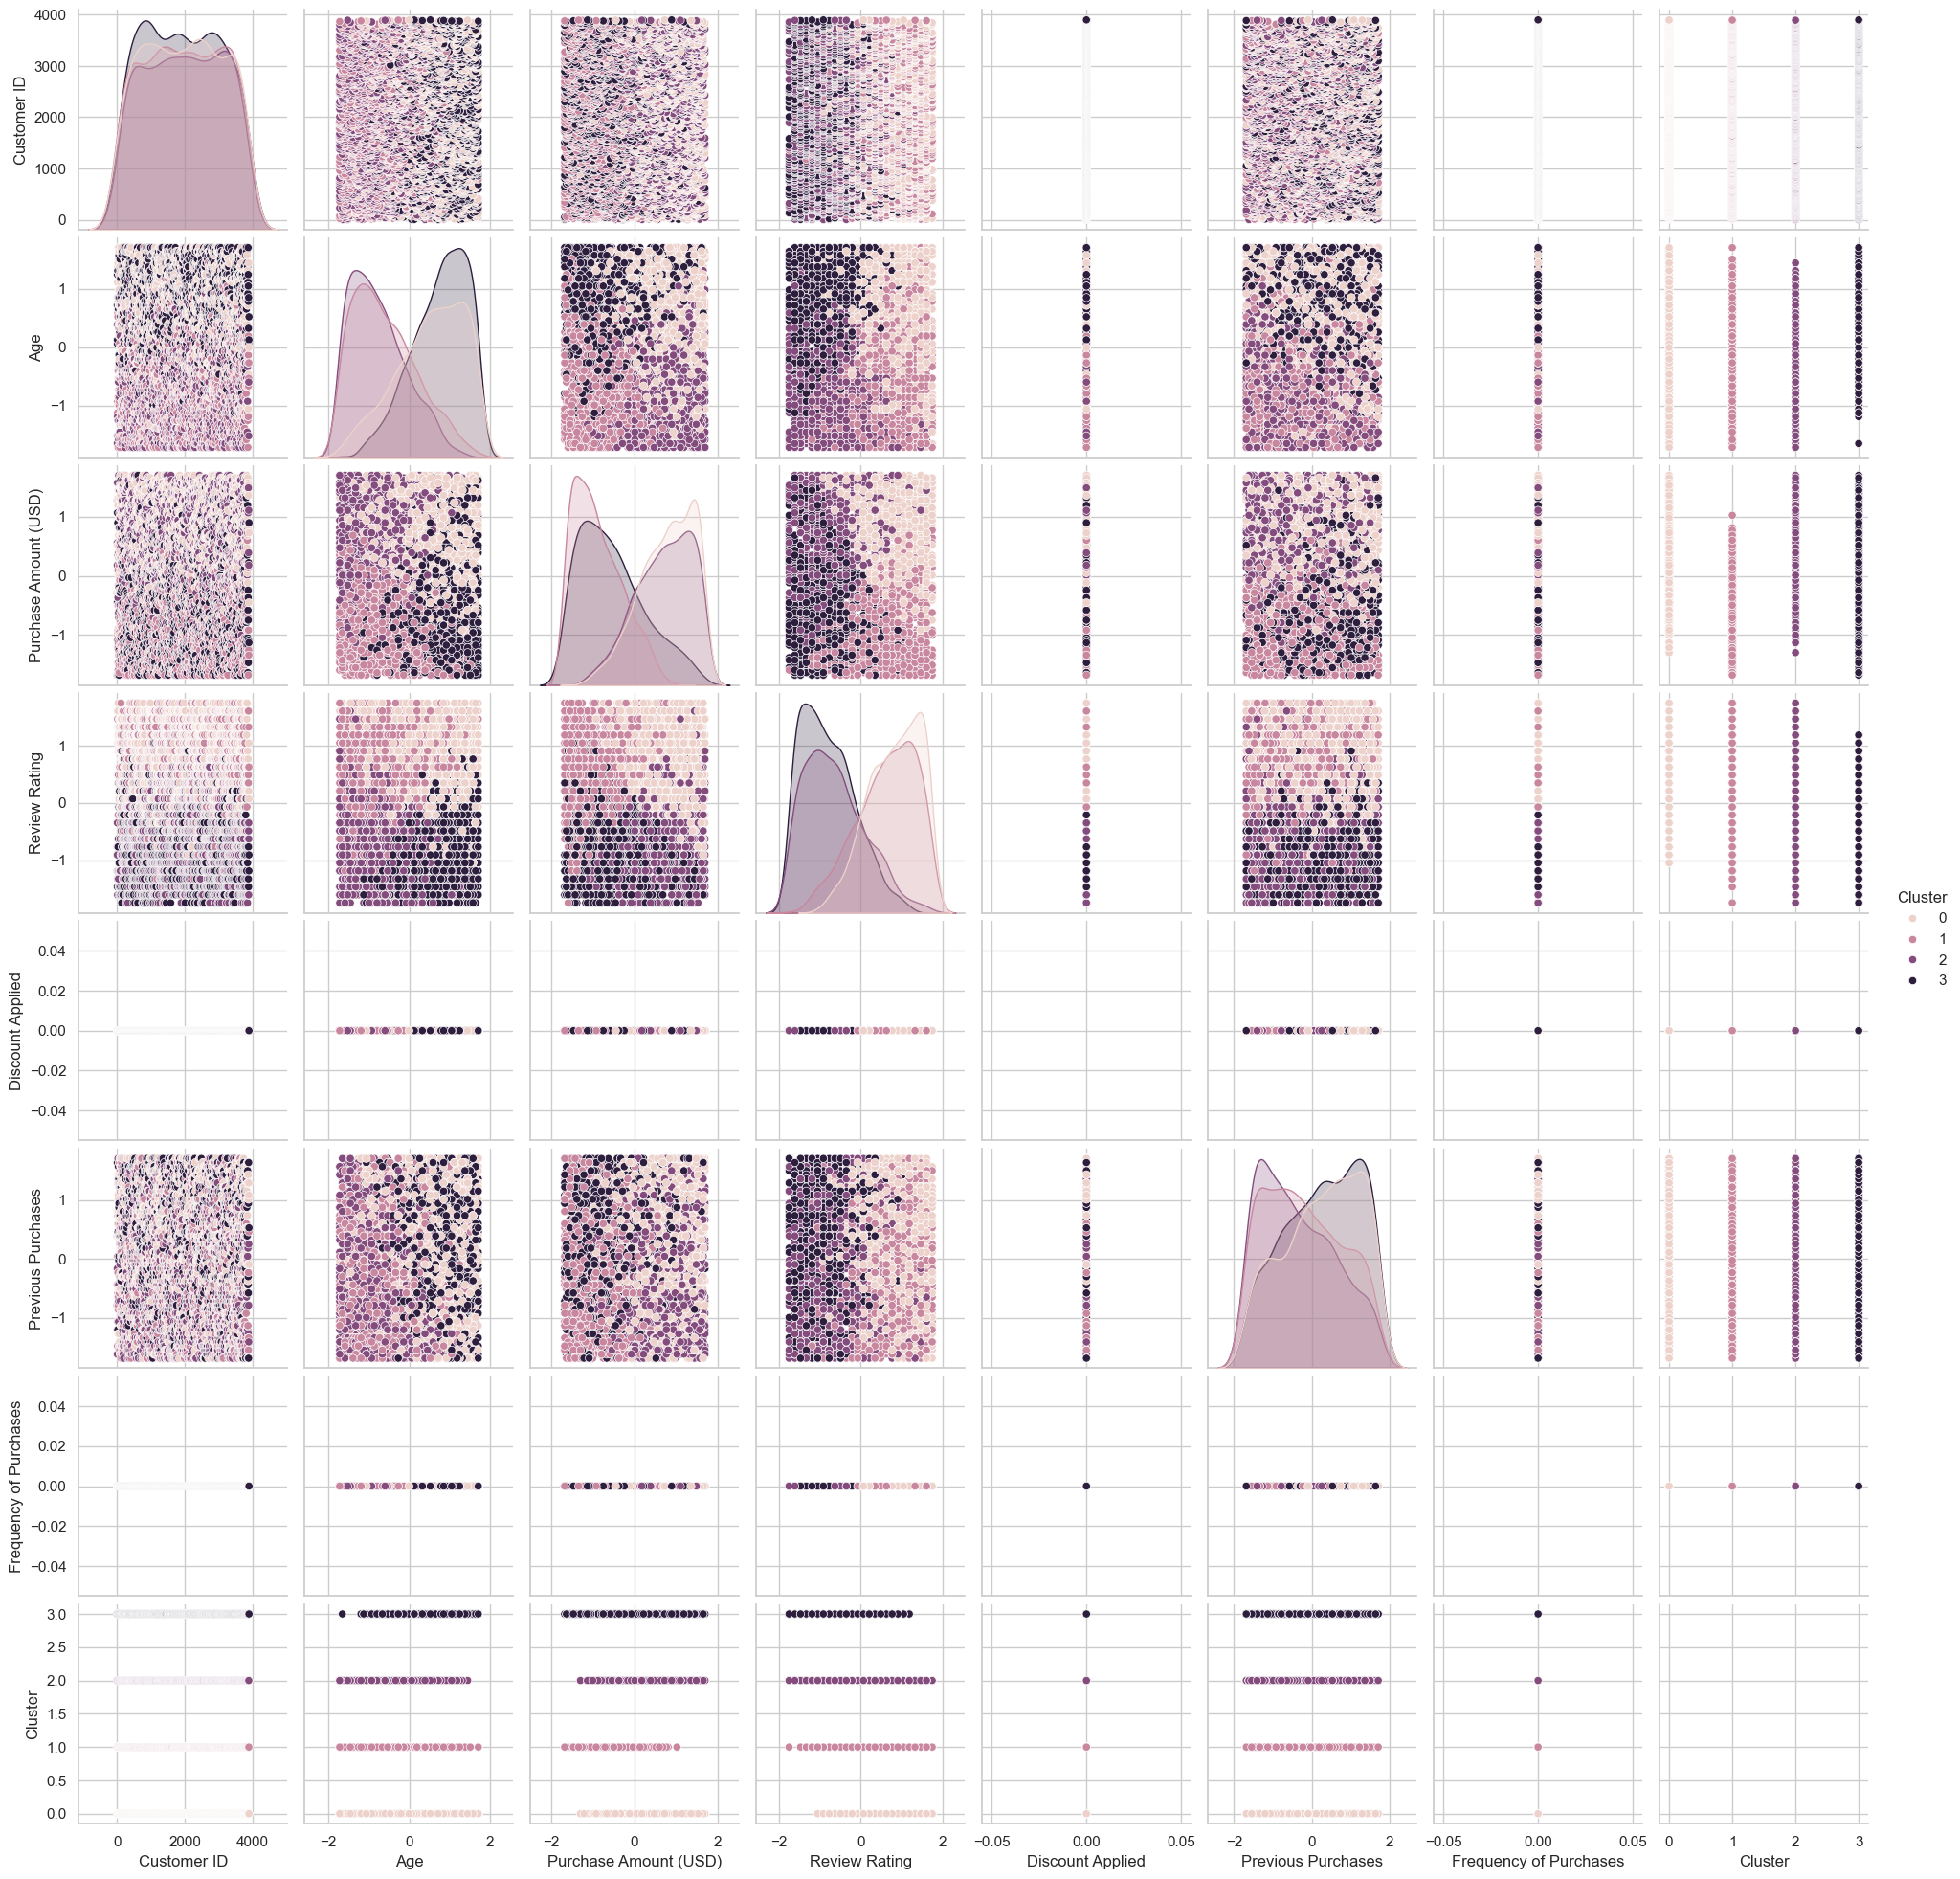

In [37]:
# Pair plot of numerical features colored by cluster
sns.pairplot(data, hue='Cluster', vars=numeric_data.columns)
plt.show()


In [ ]:
data.to_csv('clustered_customers.csv', index=False)